# Compare Perform PCA and LDA

# Install and import relevant libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import seaborn as sns

# Read and load the data

In [44]:
# Load the dataset
df_1 = pd.read_csv("../Ressources/Datasets/stand_norm_e1.txt", delimiter='\s+')
df_2 = pd.read_csv("../Ressources/Datasets/stand_norm_e2.txt", delimiter='\s+')
df = pd.concat([df_1, df_2], axis=0)

# Load the new class values
new_values = pd.read_csv("../Ressources/Datasets/y2_e1.txt", header=None, names=['New_Class'], delimiter='\s+')

# Replace the values in the 'Class' column
df['Class'] = new_values['New_Class']
df.head(900)

,Class,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
0,0.0,220.110174,185.322913,714.120693,3719.146472,0.199611,0.807951
1,0.0,290.799141,371.267847,825.465771,235.087734,0.233832,0.710784
2,0.0,245.596011,432.266516,969.556869,4529.009906,0.266850,0.607620
3,0.0,266.347021,1400.323393,1503.693799,2897.194341,0.298691,0.572977
4,0.0,72.802457,107.825008,1057.444093,2901.767221,0.329382,0.613656
...,...,...,...,...,...,...,...
895,1.0,148.194510,63.003442,111.243387,2146.133778,0.590211,0.851058
896,1.0,251.932500,1015.425353,943.971254,1671.002889,0.581489,0.719200
897,1.0,283.682276,287.911775,1446.697365,3600.282008,0.575397,0.685539
898,1.0,136.548293,223.010801,577.462713,876.711276,0.568635,0.811406


In [58]:
# Function to display correlation matrix
def correlation_matrix(df):
    fig = plt.figure(figsize=(16, 12))
    ax1 = fig.add_subplot(111)
    cmap = plt.cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Features Correlation Matrix', fontsize=15)
    labels = df.columns
    ax1.set_xticklabels(labels, fontsize=9)
    ax1.set_yticklabels(labels, fontsize=9)
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11, 11)])
    plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_26320\2371143171.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet', 30)
C:\Users\gabri\AppData\Local\Temp\ipykernel_26320\2371143171.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, fontsize=9)
C:\Users\gabri\AppData\Local\Temp\ipykernel_26320\2371143171.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels, fontsize=9)


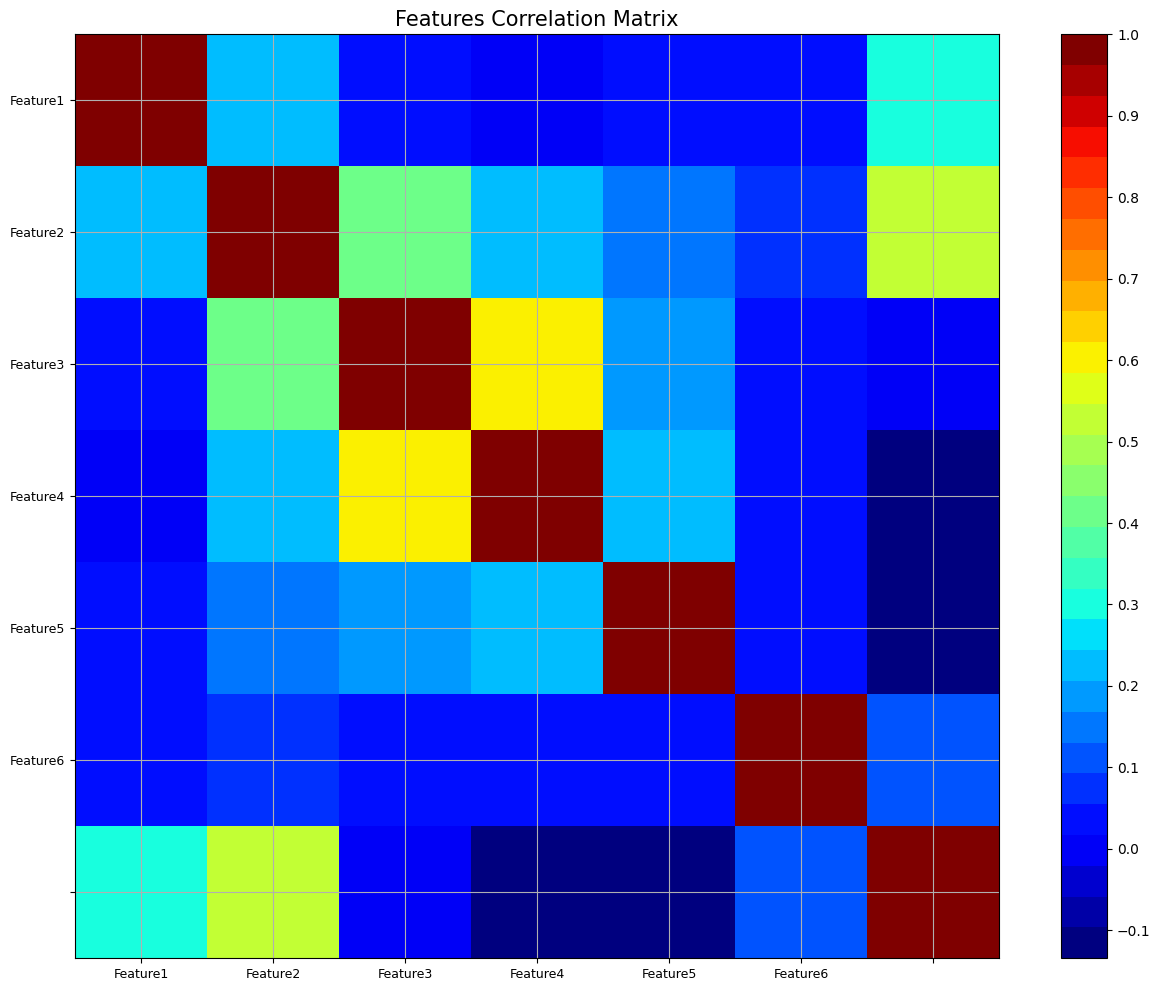

In [59]:
# Display correlation matrix
correlation_matrix(df)

In [60]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# X = df.drop('Class', axis=1) : creates a new DataFrame X containing all the columns of the DataFrame df except for the 'Class' column
# y = df['Class']: This line creates a new Series y containing only the values from the 'Class' column of the DataFrame df.

# Standardize features


In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# StandardScaler is a preprocessing technique used to standardize features by removing the mean and scaling to unit variance


# Perform PCA

In [62]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio

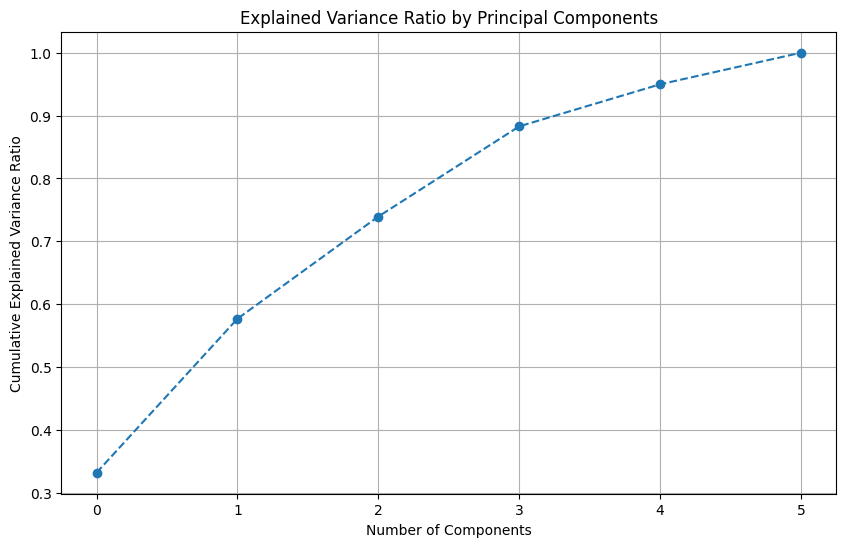

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Perform LDA

In [64]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Split data into training and testing sets

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Train and test PCA model

In [66]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and test LDA model

In [67]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate PCA and LDA performance

In [68]:
pca_score = pca.score(X_test, y_test)
lda_score = lda.score(X_test, y_test)

# Compare performance

In [72]:
if pca_score > lda_score:
    print("PCA outperforms LDA with a score of {:.2f}".format(pca_score*100))
else:
    print("LDA outperforms PCA with a score of {:.2f}".format(lda_score*100))

# lda_score typically refers to the accuracy of the LDA model in correctly predicting the class labels.
# pca_score might represent some form of model fitness or goodness-of-fit measure for the PCA model.

LDA outperforms PCA with a score of 77.65
